In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../src')
from copulagp.utils import Plot_Fit
import copulagp.bvcopula as bvcopula

In [4]:
import pickle as pkl

exp = 'ST260_Day1'
path = '../plos_fig5_data'
with open(f"{path}/{exp}_signals.pkl","rb") as f:
    data_sig = pkl.load(f)
with open(f"{path}/{exp}_behaviour.pkl","rb") as f:
    data_beh = pkl.load(f)
pos = data_beh['position']%160

In [5]:
licks = data_beh['transformed_licks']
n3 = data_sig['signals_transformed'][3]
n60 = data_sig['signals_transformed'][60]
n63 = data_sig['signals_transformed'][63]

device = 'cuda:0'
X = pos.reshape(-1,1)/160
Y = np.array([n3,n63]).T
train_x = torch.tensor(X).float().to(device=device)
train_y = torch.tensor(Y).float().to(device=device)

In [4]:
likelihoods = [bvcopula.FrankCopula_Likelihood(),
               bvcopula.ClaytonCopula_Likelihood(rotation='90°')]
waic, model = bvcopula.infer(likelihoods,train_x,train_y,device=device)

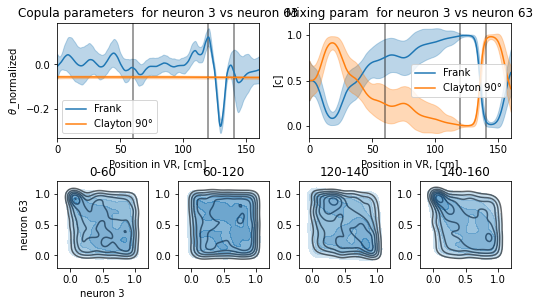

In [5]:
fig = Plot_Fit(model, X, Y, 'neuron 3', 'neuron 63', device, 
         order = None,interval_ends = np.array([0,60,120,140,160]));

In [6]:
waics, models = model.ablate(train_x,train_y)
(waic,waics)

(-0.03252372518181801, [-0.022358793765306473, -0.025351200252771378])

In [7]:
device = 'cuda:0'
X = pos.reshape(-1,1)/160
Y = np.array([licks,n60]).T
train_x = torch.tensor(X).float().to(device=device)
train_y = torch.tensor(Y).float().to(device=device)

In [8]:
likelihoods = [bvcopula.FrankCopula_Likelihood(),
               bvcopula.ClaytonCopula_Likelihood(rotation='0°'),
               bvcopula.GumbelCopula_Likelihood(rotation='270°')]
waic, model = bvcopula.infer(likelihoods,train_x,train_y,device=device)

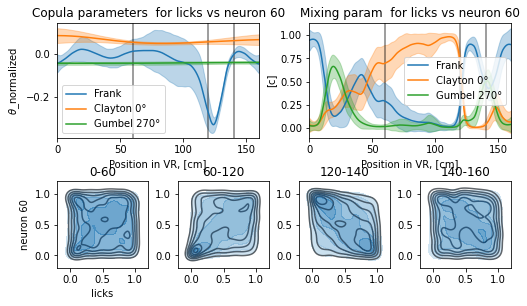

In [9]:
fig = Plot_Fit(model, X, Y, 'licks', 'neuron 60', device, 
         order = None,interval_ends = np.array([0,60,120,140,160]));

In [10]:
waics, models = model.ablate(train_x,train_y)
(waic,waics)

(-0.04264534264802933,
 [-0.03861251845955849, -0.03251826390624046, -0.038147635757923126])